In [99]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle as pkl
import os 

In [2]:
labels=[]
with open("./labels_135.pickle","rb") as file:
    labels=pkl.load(file)

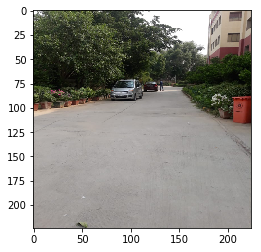

In [43]:
img=cv2.imread("./Data/images/IMG-20190708-WA0000.jpg")
img=cv2.resize(img,(224,224))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [444]:
#translation or cropping 1
def translation(img,coor):
    coor=np.array(coor)
    coor=coor.reshape((-1,4))
    img=cv2.resize(img,(224,224))
    rows,cols,_ = img.shape
    dst=img
    M = np.float32([[1,0,0],[0,1,50]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    M = np.float32([[1,0,0],[0,1,-50]])
    dst = cv2.warpAffine(dst,M,(cols,rows))
    dst=dst[50:-50,:,:]
    dst=cv2.resize(dst,(224,224))
#     p=np.array(cv2.transform(np.array(coor),M))
#     p=p.reshape((-1,4))
#     return p
    
#     coor=np.array([p[0][0],p[0][1]*224/124,p[1][0],p[1][1]*224/124])
#     print(coor)
    coor[:,1]=(coor[:,1]-50) * 224/ 124.0
    coor[:,3]=(coor[:,3]-50) * 224/ 124.0
    return dst,coor.reshape((-1,4))


In [481]:
# Rotation and Scaling 2 
def rotationScale(img,coor,angle=5,scale=1.1):
    coor=np.array(coor)
    coor=coor.reshape((-1,2,2))
    rows,cols,_ = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,scale)
    dst = cv2.warpAffine(img,M,(cols,rows))
    dst=cv2.resize(dst,(224,224))
    coor=np.array(cv2.transform(coor,M))
#     print(coor)
    return dst,coor.reshape((-1,4))

In [270]:
#FLIP 3
def flip(img,coor):
    coor=np.array(coor)
    coor=coor.reshape((-1,4))
    dst=cv2.flip(img,1)
    dst=cv2.resize(dst,(224,224))
#     print(coor)
    coor[:,0]=224-coor[:,0]
    coor[:,2]=224-coor[:,2]
    return dst,coor.reshape((-1,4))

In [271]:
def augmentation(labels):
    augment_labels=[]
    count=1
    for image in labels:
        img=cv2.imread("./Data/images/"+image[0])
        augs=[]
        augs.append(translation(img,image[1][1]))             #1
        augs.append(rotationScale(img,image[1][1]))           #2
        augs.append(rotationScale(img,image[1][1],angle=-7))  #3
        augs.append(rotationScale(img,image[1][1],angle=0))   #4
        augs.append(flip(img,image[1][1]))                    #5
        i=0
        for augim in augs:
            name=image[0].split(".")[0]+"_"+str(i+1)+".jpg"
            i+=1
            cv2.imwrite("./Data/aug_images/"+name,augim[0])
            augment_labels.append((name,(image[1][0],augim[1],image[1][-1])))
        print(count,end=" ")
        count+=1
    return augment_labels

In [272]:
augment_labels=augmentation(labels=labels[:10])

1 2 3 4 5 6 7 8 9 10 

In [274]:
# augment_labels

In [392]:
# image=labels[2]
# img=cv2.imread("./Data/images/"+image[0])

# fig=plt.figure(figsize=(20,20))
# ax1=fig.add_subplot(1,3,1)
# im,coor=flip(img,image[1][1])
# for i in range(coor.shape[0]):
#     im=cv2.rectangle(im,(int(coor[i][0]),int(coor[i][1])),(int(coor[i][2]),int(coor[i][3])),(0,255,0),2)
# ax1.imshow(im)

# ax1=fig.add_subplot(1,3,2)
# im,coor=translation(img,image[1][1])
# for i in range(coor.shape[0]):
#     im=cv2.rectangle(im,(int(coor[i][0]),int(coor[i][1])),(int(coor[i][2]),int(coor[i][3])),(0,255,0),2)
# ax1.imshow(im)

# ax1=fig.add_subplot(1,3,3)
# im,coor=rotationScale(img,image[1][1])
# for i in range(coor.shape[0]):
#     im=cv2.rectangle(im,(int(coor[i][0]),int(coor[i][1])),(int(coor[i][2]),int(coor[i][3])),(0,255,0),2)
# ax1.imshow(im)

In [393]:
coor[:,1],coor

(array([239.6825], dtype=float32),
 array([[ 74.84013, 239.6825 , 153.49147, 145.38664]], dtype=float32))

[[ 13.376818  73.06214  239.51953  138.75104 ]]
[array([ 25.76888,  68.92249, 225.36618, 146.33029], dtype=float32)]


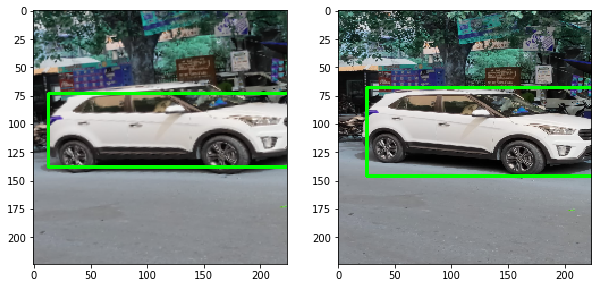

In [489]:
a=np.random.randint(0,135)
image=labels[a]
# print(image)
img=cv2.resize(cv2.imread("./Data/images/"+image[0]),(224,224))
# p=translation(img,image[1][1])
im,coor=rotationScale(img,image[1][1])
print(coor)
print(image[1][1])
for i in range(coor.shape[0]):
    im=cv2.rectangle(im,(int(coor[i][0]),int(coor[i][1])),(int(coor[i][2]),int(coor[i][3])),(0,255,0),2)
    img=cv2.rectangle(img,(int(image[1][1][i][0]),int(image[1][1][i][1])),(int(image[1][1][i][2]),int(image[1][1][i][3])),(0,255,0),2)
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.imshow(im)
ax2.imshow(img)

In [485]:
a

47

In [318]:
p[:][1]

array([112.98849,  43.75379], dtype=float32)